# Loss Comparison

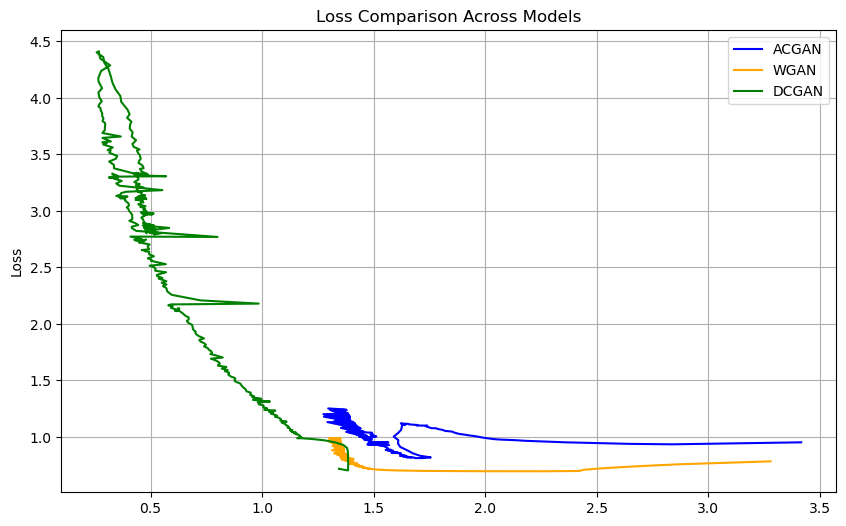

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data1 = np.load('acgan/loss_tracker.npy')
data2 = np.load('wgan/loss_tracker.npy')
data3 = np.load('dcgan/loss_tracker.npy')

# Optional: Apply downsampling or smoothing
# Uncomment the following for smoothing with a moving average:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Assuming all data has the same structure (e.g., [x, y])
x1, y1 = data1[:, 0], moving_average(data1[:, 1], window_size=10)
x2, y2 = data2[:, 0], moving_average(data2[:, 1], window_size=10)
x3, y3 = data3[:, 0], moving_average(data3[:, 1], window_size=10)

# Adjust x-values to match the length of smoothed y-values
x1, x2, x3 = x1[:len(y1)], x2[:len(y2)], x3[:len(y3)]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x1, y1, label='ACGAN', color='blue')
plt.plot(x2, y2, label='WGAN', color='orange')
plt.plot(x3, y3, label='DCGAN', color='green')

# Add labels, title, and legend
plt.ylabel('Loss')  # Replace with actual label
plt.title('Loss Comparison Across Models')
plt.legend()
plt.grid()
plt.savefig("Loss_compare.png")
plt.show()